# Tutorial Notebook for UN Datathon Participants 🌐 🔐


This notebook is designed to acquaint participants of the UN datathon with antigranular, which is your private data exploration toolkit, and showcase its main functions!

## What is Antigranular?

With Antigranular, you can use Python to securely explore and gain insights from your data without ever seeing sensitive information. 🕵️‍♂️🔐

Antigranular leverages AWS enclaves, which are isolated and protected environments that run on the cloud. AWS enclaves ensure that your data and code are safe from unauthorised access, even from AWS itself. 🛡️☁️

Antigranular also integrates with powerful differential privacy libraries, such as OpenDP, SmartNoise, and DiffPrivLib. Differential privacy is a technique that adds controlled noise to your data analysis, preserving the privacy of individual records while still allowing you to draw meaningful conclusions. 📊🔇

With Antigranular, you can work with private sensitive datasets conveniently, knowing that your data analysis remains confidential and insightful! 😊👍

## How to Use antigranular?


### Install the Package 📦

First, we need to add antigranular to our local jupyter kernel. You can do this by installing it directly from PyPI, which is like an app store but for python packages!


In [ ]:
!pip install antigranular

  Using cached ipython-7.34.0-py3-none-any.whl (793 kB)
  Attempting uninstall: ipython
    Found existing installation: ipython 8.5.0
    Not uninstalling ipython at /shared-libs/python3.9/py-core/lib/python3.9/site-packages, outside environment /root/venv
    Can't uninstall 'ipython'. No files were found to uninstall.

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


### Using Antigranular for Secure Computations 🔐

Now that you're connected, your ag.login initiates a secure session with Antigranular where we can work with our data confidentially.

See the the %%ag at the beginning of a cell? It indicates that the code within this cell will be executed securely on the Antigranular platform, ensuring the confidentiality of our computations. Like magic! 😍

In [ ]:
import antigranular as ag
session = ag.login('p11SJhgsFi5/6TXAze0wCUazMIbE1hEB','6/luubcMt+RNikaG1D2HMF/J1kdSthKysDVfwxBBwqLG+t/4tTLD5k9B0DAMhuhh', competition = "UN Datathon PETs Track")

cert_thumbprint: dac4f8231398535cb4c3840ad35c9cf73f005f539510af233d2b9241bb95aec6abc0068867c5d19ceb17a15d66fc2e9ba84fdef49ef0758c95fa0ef9028bbb4a
server_hostname: ip-100-100-21-68.eu-west-1.compute.internal
tls_cert_name: ip-100-100-21-68.eu-west-1.compute.internal_6f616886-add7-46bc-bf41-dc3a01eacaf4
local_host_port: 6f616886-add7-46bc-bf41-dc3a01eacaf4
Connected to Antigranular server session id: c06e2b95-fcfd-4c9e-a15c-1800fdef2294, the session will time out if idle for 60 minutes
Cell magic '%%ag' registered successfully, use `%%ag` in a notebook cell to execute your python code on Antigranular private python server
🚀 Everything's set up and ready to roll!


🔑 Note: Replace `<client_id>`, `<client_secret>`, with actual values that you will get from antigranular.com to get connected.

🔐 Ensure to substitute `<client_id>` and `<client_secret>` with your respective Antigranular credentials.

## Loading the Data 🚀

For this datathon, we possess an extensive private dataset, which we have divided into 19 separate smaller datasets. This division allows for each dataset to be loaded individually, promoting swifter execution times, so there's nothing holding you back. 💥

The [op_pandas](https://docs.antigranular.com/private-python/packages/pandas) library includes functionality for merging and joining two datasets, enabling the combination of multiple datasets.

You can load two datasets by using `load_dataset` functionality, which returns an `op_pandas.PrivateDataFrame` object.

In [ ]:
%%ag
undata_ls = load_dataset("undata_ls")
undata_ls_dif = load_dataset("undata_ls_dif")

Dataframe loaded successfully to the kernel



## Checking the Privacy Budget 🤑

Privacy-preserving algorithms used by libraries often consume a "privacy budget" to ensure that data privacy is maintained. Here's how you can check your spending:

In [ ]:
session.privacy_odometer()

{'total_epsilon_used': 1.9999999999999951,
 'total_delta_used': 0.0,
 'library_costs': {'op_pandas': {'total_delta': 0,
   'total_epsilon': 1.9999999999999951,
   'total_requests': 2}},
 'dataset_costs': {'undata_ls': {'delta': 0, 'eps': 0.9999999999999976},
  'undata_ls_dif': {'delta': 0, 'eps': 0.9999999999999976}}}

## Viewing Data 🔍

To protect privacy, records in PrivateDataFrame and PrivateSeries cannot be viewed directly. But that doesn't mean you can't see anything! 👀 You can still analyse and obtain statistical information about the data using methods that offer differential privacy guarantees.


### Viewing Details About the Data

`ag_print` is a function packaged within Antigranular which can be used to print objects from the ag environment.

Here's how you can print the details about the data, like `columns` and `metadata`:

In [ ]:
%%ag

ag_print("undata_ls Details: \n")
ag_print("Columns: \n", undata_ls.columns)
ag_print("Metadata: \n", undata_ls.metadata)
ag_print("Dtypes: \n", undata_ls.dtypes)

undata_ls Details: 

Columns: 
 Index(['objectid', 'ls_main', 'ls_num_lastyr', 'ls_num_now', 'ls_num_diff',
       'ls_num_increased', 'ls_num_decreased', 'ls_num_no_change',
       'ls_num_inc_less_sales', 'ls_num_inc_more_birth',
       'ls_num_inc_more_acquired', 'ls_num_inc_received_free',
       'ls_num_dec_poor_health', 'ls_num_dec_death',
       'ls_num_dec_sales_good_price', 'ls_num_dec_sales_distress',
       'ls_num_dec_escape_stolen', 'ls_num_dec_consumed',
       'ls_num_inc_dec_other', 'ls_num_inc_dec_dk', 'ls_num_inc_dec_ref',
       'ls_feed_open_pasture', 'ls_feed_common_pasture',
       'ls_feed_self_produced', 'ls_feed_purchased', 'ls_feed_free_dist',
       'ls_feed_other', 'ls_feed_dk', 'ls_feed_ref'],
      dtype='object')
Metadata: 
 {'objectid': (3496, 239871), 'ls_main': (1.0, 999.0), 'ls_num_lastyr': (0.0, 200000.0), 'ls_num_now': (0.0, 200000.0), 'ls_num_diff': (-99955.0, 18000.0), 'ls_num_increased': (0.0, 1.0), 'ls_num_decreased': (0.0, 1.0), 'ls_num_no_chan

In [ ]:
%%ag

ag_print("undata_ls_dif Details: \n")
ag_print("Columns: \n", undata_ls_dif.columns)
ag_print("Metadata: \n", undata_ls_dif.metadata)
ag_print("Dtypes: \n", undata_ls_dif.dtypes)

undata_ls_dif Details: 

Columns: 
 Index(['objectid', 'ls_proddif', 'ls_proddif_feed_purchase',
       'ls_proddif_access_pasture', 'ls_proddif_access_water',
       'ls_proddif_vet_serv', 'ls_proddif_vet_input', 'ls_proddif_diseases',
       'ls_proddif_theft', 'ls_proddif_access_market',
       'ls_proddif_access_credit', 'ls_proddif_access_labour',
       'ls_proddif_other', 'ls_proddif_dk', 'ls_proddif_ref', 'ls_salesmain',
       'ls_salesdif', 'ls_salesdif_marketing_cost',
       'ls_salesdif_damage_losses', 'ls_salesdif_low_demand',
       'ls_salesdif_pay_delay', 'ls_salesdif_low_price',
       'ls_salesdif_slaughterhouse', 'ls_salesdif_processing',
       'ls_salesdif_competition', 'ls_salesdif_other', 'ls_salesdif_dk',
       'ls_salesdif_ref', 'ls_salesprice'],
      dtype='object')
Metadata: 
 {'objectid': (3496, 239871), 'ls_proddif': (0.0, 999.0), 'ls_proddif_feed_purchase': (0.0, 1.0), 'ls_proddif_access_pasture': (0.0, 1.0), 'ls_proddif_access_water': (0.0, 1.0), 'ls_p

`metadata` denotes the bounds of numerical data.

### Quick Statistics 📊

One way to obtain the quick-statistic is by using the `describe()` method. You can spend some epsilon and obtain a rough meta-data about the dataset to give you a quick overview.



In [ ]:
%%ag

undata_ls_describe = undata_ls.describe(eps=1)
ag_print("undata_ls Describe:\n", undata_ls_describe)

undata_ls_dif_describe = undata_ls_dif.describe(eps=1)
ag_print("undata_ls Describe:\n", undata_ls_describe)

undata_ls Describe:
             objectid        ls_main  ...     ls_feed_dk    ls_feed_ref
count  106367.000000  106367.000000  ...  106367.000000  106367.000000
mean    92936.236725       8.676817  ...       0.000557       0.000000
std     77757.621044      99.186782  ...       0.155120       0.050015
min      4817.363469       1.575387  ...       0.000000       0.000000
25%     31514.997202       1.023579  ...       0.005082       0.000005
50%     62652.891748       2.597446  ...       0.004342       0.043244
75%    148982.113962       4.812395  ...       0.048666       0.000532
max    239695.675175     848.020513  ...       0.342426       0.922268

[8 rows x 29 columns]

undata_ls Describe:
             objectid        ls_main  ...     ls_feed_dk    ls_feed_ref
count  106367.000000  106367.000000  ...  106367.000000  106367.000000
mean    92936.236725       8.676817  ...       0.000557       0.000000
std     77757.621044      99.186782  ...       0.155120       0.050015
min      48

You can view the statistics by exporting the non-private result to the local Jupyter server using the `export` method:

In [ ]:
%%ag

export(undata_ls_describe, name='undata_ls_describe')

Setting up exported variable in local environment: undata_ls_describe


Now, we can access undata_ls_describe in our local jupyter environment.

In [ ]:
print(undata_ls_describe)

            objectid        ls_main  ls_num_lastyr     ls_num_now  \
count  106185.000000  106185.000000  106185.000000  106185.000000   
mean    92199.485129       7.816713       0.000000     331.868824   
std     76087.242120      73.061298    5624.693022    7254.049465   
min      3519.541501       1.713129       0.447456       0.644493   
25%     29871.945918       1.636787       3.437733       2.929117   
50%     62807.458659       2.426776       7.898750       5.579087   
75%    145812.721959       4.401986      24.142968      14.531526   
max    239801.942443     861.662747    2255.110719   57609.159598   

         ls_num_diff  ls_num_increased  ls_num_decreased  ls_num_no_change  \
count  106185.000000     106185.000000     106185.000000     106185.000000   
mean     -279.706929          0.253309          0.604430          0.141889   
std      7763.362463          0.441027          0.487240          0.347218   
min    -24412.165142          0.000000          0.000000          

## Data Preprocessing 🌐

### Importing External Data

Guess what? You can also import any external data, merge it with the data provided to get some inferences.

Here is an example on how to do that:

In [ ]:
'''
Creating mock data

Mock data will just be 100 rows of age and salary information
'''

import pandas as pd
import numpy as np

n_num = 100
df = pd.DataFrame({'age': np.random.randint(0, 80, n_num), 'salary': np.random.randint(100, 100000, n_num)})
session.private_import(data = df, name= 'imported_df')

dataframe cached to server, loading to kernel...
Output: Dataframe loaded successfully to the kernel



In [ ]:
%%ag
# Creating a PrivateDataFrame out of the DataFrame imported.
import op_pandas

metadata = {
    'age': (0, 80),
    'salary': (1, 200000)
}

priv_df = op_pandas.PrivateDataFrame(imported_df ,metadata = metadata)

In [ ]:
%%ag

ag_print("Private DataFrame Describe:\n", priv_df.describe(eps=1))

Private DataFrame Describe:
               age         salary
count  101.000000     101.000000
mean    36.317860   41948.430455
std     30.129153   72960.294206
min      0.000000  138231.258430
25%     33.987172   23466.731507
50%     24.641754   35196.162670
75%     44.298147  188874.454173
max     76.290584   87214.063415



Now that `priv_df` is within the ag environment, you can do any operation with the original data and extract inferences.

### Combining Datasets: `undata_ls` and `undata_ls_dif`

To facilitate certain analyses and visualisations, it might be useful to combine our two datasets (`undata_ls` and `undata_ls_dif`) into a single dataset.

This can allow us to explore relationships between features more efficiently. 🤝🏼

In [ ]:
%%ag

import op_pandas

joined_data = op_pandas.merge(undata_ls, undata_ls_dif, on="objectid")

ag_print("Joined Data Columns: \n", joined_data.columns)

Joined Data Columns: 
 Index(['objectid', 'ls_main', 'ls_num_lastyr', 'ls_num_now', 'ls_num_diff',
       'ls_num_increased', 'ls_num_decreased', 'ls_num_no_change',
       'ls_num_inc_less_sales', 'ls_num_inc_more_birth',
       'ls_num_inc_more_acquired', 'ls_num_inc_received_free',
       'ls_num_dec_poor_health', 'ls_num_dec_death',
       'ls_num_dec_sales_good_price', 'ls_num_dec_sales_distress',
       'ls_num_dec_escape_stolen', 'ls_num_dec_consumed',
       'ls_num_inc_dec_other', 'ls_num_inc_dec_dk', 'ls_num_inc_dec_ref',
       'ls_feed_open_pasture', 'ls_feed_common_pasture',
       'ls_feed_self_produced', 'ls_feed_purchased', 'ls_feed_free_dist',
       'ls_feed_other', 'ls_feed_dk', 'ls_feed_ref', 'ls_proddif',
       'ls_proddif_feed_purchase', 'ls_proddif_access_pasture',
       'ls_proddif_access_water', 'ls_proddif_vet_serv',
       'ls_proddif_vet_input', 'ls_proddif_diseases', 'ls_proddif_theft',
       'ls_proddif_access_market', 'ls_proddif_access_credit',
      

Using `merge` method, we merge the two PrivateDataFrames.

## Data Visualisation 🤩

The next function in your arsenal is data visualisation. This is a pivotal step in exploratory data analysis. By visualising our data, we can observe patterns, anomalies, and relationships between variables that might not be apparent from the raw data alone.


### Exploring the Data Using `histograms`

We can visualise different columns using differentially private `histograms`.

In [ ]:
%%ag

hist_data = joined_data.hist(column='ls_salesprice',eps=1)
export(hist_data , 'hist_data')

Setting up exported variable in local environment: hist_data


To visualise the histogram locally, you can use matplotlib or any other plotting library of your choice.

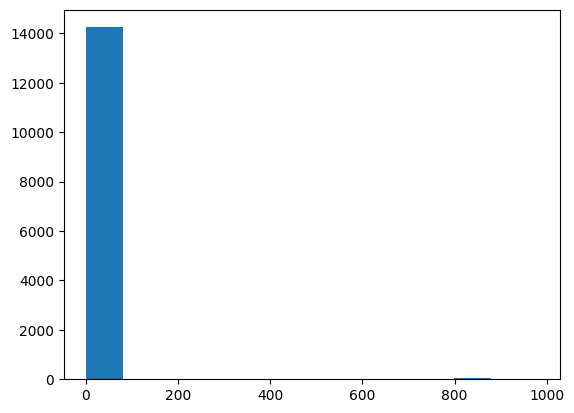

In [ ]:
import matplotlib.pyplot as plt
dp_hist, dp_bins = hist_data
# Create a bar plot using Matplotlib
plt.bar(dp_bins[:-1], dp_hist, width=np.diff(dp_bins)*0.8, align='edge')

# Display the plot
plt.show()

### Splitting the Data

You can use `op_pandas.train_test_split` to split the data into `training` and `testing` parts randomly to train any of the models provided in `op_diffprivlib`.

Here is an example on how to remove some columns from the data, and split the rest into `training` and `testing` parts.

In [ ]:
%%ag
# removing 'ls_num_dec_poor_health' and 'ls_num_dec_death' from the joined dataset.

joined_data.drop(['ls_num_dec_poor_health', 'ls_num_dec_death'])

train_data, test_data = op_pandas.train_test_split(joined_data)

ag_print("Train Data Description: \n", train_data.describe(eps = 1))
ag_print("Test Data Description: \n", test_data.describe(eps = 1))

Train Data Description: 
             objectid       ls_main  ...  ls_salesdif_ref  ls_salesprice
count   71764.000000  71764.000000  ...     71764.000000   71764.000000
mean    87723.346083     19.967198  ...         0.003831       2.930083
std     74916.543941    176.137770  ...         0.070206     171.174433
min      4440.666874      1.116038  ...         0.000000       1.404697
25%     27488.830761      1.658668  ...         0.047793      82.934283
50%     56615.714506      2.557102  ...         0.000031     772.809237
75%    142432.383008      6.060757  ...         0.000612     547.438244
max    239430.281569    603.245869  ...         0.291907     908.045429

[8 rows x 55 columns]

Test Data Description: 
             objectid       ls_main  ...  ls_salesdif_ref  ls_salesprice
count   24631.000000  24631.000000  ...     24631.000000   24631.000000
mean    98690.136499      1.000000  ...         0.021480      56.652050
std     92004.903579    264.520265  ...         0.099170     

Now you can train any model from `op_diffprivlib`.

Now that we are all done, we can terminate the session. Happy coding! 😎

In [ ]:
session.terminate_session()

{'status': 'ok'}

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=008b30f3-1127-48f8-a4b4-f5cb6476cfc1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>